# **Data Analytics**
------

## Sentiment Analysis Lab


Take the **TRUMP** tweets and create your analytics:


*   When Trump wishes the Olympic team good luck, he’s tweeting
from his iPhone.
*   When he’s insulting a rival, he’s usually tweeting from an Android.

Make your analytics!

*Is this an artifact showing which tweets are Trump’s own and which
are by some handler? Any other insights?*

### Hint

Control for instance:
* Number of tweets from Android/iPhone
* Most frequent positive and words
* Sentiment dynamics

In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from afinn import Afinn
import numpy as np
import pandas as pd

from nltk.tokenize import word_tokenize

import re

from nltk.tokenize import TweetTokenizer

from collections import Counter
import itertools

from nltk.corpus import stopwords

import string
from nltk import wordpunct_tokenize

from nltk.stem.lancaster import LancasterStemmer
lancaster_stemmer = LancasterStemmer()

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words=None, lowercase=True, max_features=5000)

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

from sklearn.metrics import accuracy_score, precision_recall_fscore_support

[nltk_data] Downloading package punkt to /Users/Giorgia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Giorgia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
url = 'https://raw.githubusercontent.com/nprapps/trump-tweet-analysis/master/data/since-20170120.json'
trump_df = pd.read_json(url)

In [3]:
print(type(trump_df))
print(len(trump_df))

<class 'pandas.core.frame.DataFrame'>
4575


In [4]:
trump_df.head(6)

,created_at,favorite_count,id_str,is_retweet,retweet_count,source,text
0,2018-09-01 02:40:23,21996,1035718986871320576,False,5540,Twitter for iPhone,Still can’t believe that Bloomberg violated a ...
1,2018-09-01 02:36:57,18946,1035718119459893248,False,3885,Twitter for iPhone,Great day in North Carolina where Republicans ...
2,2018-09-01 02:35:28,20129,1035717747936768000,False,5164,Twitter for iPhone,The ABC/Washington Post Poll was by far the le...
3,2018-09-01 02:25:38,21855,1035715271418413056,False,5717,Twitter for iPhone,.@Rasmussen_Poll just came out at 48% approval...
4,2018-09-01 00:01:21,31907,1035678961349668864,False,8506,Twitter for iPhone,https://t.co/c79zLeREOA
5,2018-08-31 22:07:25,34220,1035650292782653440,False,9169,Twitter for iPhone,“President Donald J. Trump is Strengthening Re...


In [5]:
tweets = trump_df['text']
tweets.head()

0    Still can’t believe that Bloomberg violated a ...
1    Great day in North Carolina where Republicans ...
2    The ABC/Washington Post Poll was by far the le...
3    .@Rasmussen_Poll just came out at 48% approval...
4                              https://t.co/c79zLeREOA
Name: text, dtype: object

## Number of tweets from Android/iPhone

In [7]:
tweets_iphone = trump_df[trump_df.source == 'Twitter for iPhone'].apply(pd.to_numeric, errors='coerce')
print('Number of tweets from iPhone: ', len(tweets_iphone))

tweets_android = trump_df[trump_df.source == 'Twitter for Android'].apply(pd.to_numeric, errors='coerce')
print('Number of tweets from Android: ', len(tweets_android))

Number of tweets from iPhone:  4134
Number of tweets from Android:  174


## Most frequent positive and words

In [8]:
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

# Function to get the counter
def get_counter(df):
    sentences = (list(itertools.chain(df)))
    flat_list = [item for sublist in sentences for item in sublist]
    c = Counter(flat_list)
    return c

In [9]:
tweets.apply(preprocess)

0       [Still, can, ’, t, believe, that, Bloomberg, v...
1       [Great, day, in, North, Carolina, where, Repub...
2       [The, ABC, /, Washington, Post, Poll, was, by,...
3       [., @Rasmussen_Poll, just, came, out, at, 48, ...
4                               [https://t.co/c79zLeREOA]
5       [“, President, Donald, J, ., Trump, is, Streng...
6       [Wow, ,, I, made, OFF, THE, RECORD, COMMENTS, ...
7       [I, will, be, doing, a, major, rally, for, Sen...
8       [Thank, you, Indiana, ,, I, love, you, !, http...
9       [Throwback, Thursday, !, #MAGA, https://t.co/8...
10      [Kevin, Stitt, ran, a, great, winning, campaig...
11      [CNN, is, working, frantically, to, find, thei...
12      [Will, be, going, to, Evansville, ,, Indiana, ...
13      [I, am, very, excited, about, the, person, who...
14      [The, Rigged, Russia, Witch, Hunt, did, not, c...
15      [Wow, ,, Nellie, Ohr, ,, Bruce, Ohr, ’, s, wif...
16      [I, am, very, excited, about, the, person, who...
17      [The, 

In [43]:
tweets_tokenized = tweets.apply(tokening.tokenize)

# Stopwords removal
stop = stopwords.words('english')
# adding some of the stopwords after observing the tweets
stop = set(stop)
stop.add("”")
stop.add("“")
stop.add("’")
stop.add("…")
stop.add("...")
stop.add("u")
stop.add("🇸")
stop.add("🇺")
stop = list(stop)

tweets_tokenized_stop = tweets_tokenized.apply(lambda x: [item for item in x if item.lower() not in stop])

# Punctuation removal
punctuation = string.punctuation

tweets_tokenized_stop_punct = tweets_tokenized_stop.apply(lambda x: [item for item in x if item not in punctuation])

# Stemming
lancaster_stemmer = LancasterStemmer()

tweets_tokenized_new_stem = tweets_tokenized_stop_punct.apply(lambda x: [lancaster_stemmer.stem(item) for item in x])
tweets_tokenized_new_stem

sentences = (list(itertools.chain(tweets_tokenized_new_stem)))
flat_list = [item for sublist in sentences for item in sublist]
flat_list

c = Counter(flat_list)
c.most_common(30)
#RT stay for rusty trump

[('gre', 1043),
 ('new', 593),
 ('rt', 533),
 ('peopl', 473),
 ('country', 406),
 ('presid', 399),
 ('stat', 365),
 ('work', 353),
 ('trump', 351),
 ('big', 351),
 ('job', 350),
 ('ev', 345),
 ('thank', 343),
 ('democr', 343),
 ('fak', 339),
 ('get', 314),
 ('tax', 304),
 ('year', 303),
 ('today', 302),
 ('many', 300),
 ('am', 294),
 ('russ', 285),
 ('tim', 284),
 ('mak', 283),
 ('americ', 283),
 ('us', 264),
 ('want', 263),
 ('bord', 262),
 ('republ', 250),
 ('look', 234)]

(-0.5, 399.5, 199.5, -0.5)

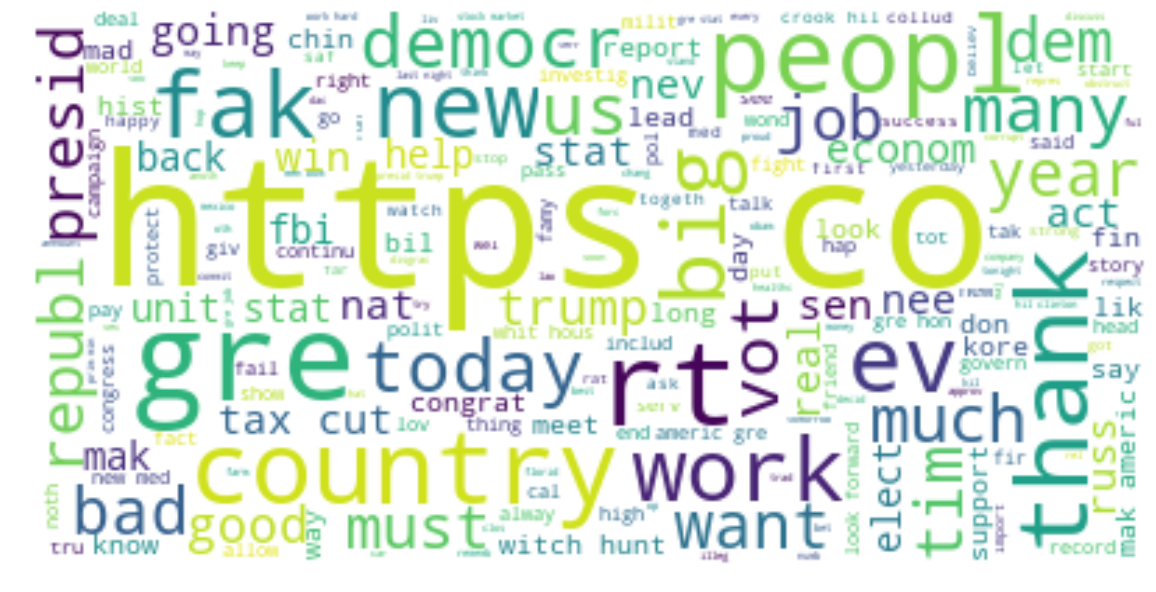

In [44]:
fig = plt.figure(figsize=(20,14))
wordcloud = WordCloud(background_color="white").generate(" ".join(flat_list))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## Sentiment dynamics